In [8]:
from mcm import EcModel
reference= 'eclogitization_hacker2015_md_xenolith'

In [9]:
# Perple_X output...
''' Stixrude 2021

Stable phases at:
                             T(K)     =  1273.00
                             P(bar)   =  5000.00

Phase Compositions (molar  proportions):
                   wt %      vol %     mol %     mol        NA2O     MGO      AL2O3    SIO2     CAO      FEO
 Pl                55.60     61.47     50.34    0.201      0.20011  0.00000  0.79989  2.40023  0.59977  0.00000
 Cpx               14.70     13.10     16.10    0.643E-01  0.02656  0.67820  0.03646  1.99010  0.90294  0.30271
 Opx               29.20     24.85     31.52    0.126      0.00000  1.09205  0.02807  1.97193  0.03959  0.84029
 qtz                0.50      0.58      2.04    0.816E-02  0.00000  0.00000  0.00000  1.00000  0.00000  0.00000

Phase speciation (molar proportions):

 Pl                ab: 0.40023, an: 0.59977
 Cpx               jd: 0.05313, di: 0.59033, hed: 0.30271, cen: 0.04393, cts: 0.00990
 Opx               odi: 0.03959, en: 0.51220, fs: 0.42014, ts: 0.02807

 
'''


phases = [
    'Clinopyroxene',
    'Orthopyroxene',
    'Quartz',
    'Feldspar', 
    'Garnet', 
    'Kyanite',
]

ems = [
    'Diopside', 'Hedenbergite', 'Clinoenstatite', 'CaTschermaks', 'Jadeite',
    'Enstatite', 'Ferrosilite', 'MgTschermaks', 'OrthoDiopside',
    'Quartz',
    'Anorthite','Albite',
    'Pyrope', 'Almandine', 'Grossular', 'MgMajorite', 'NaMajorite',
    'Kyanite'
]

# mass fractions of the phases
## Grt-Opx-Cpx granulite
## given as volume fractions
phii0 = [
    0.1310, # cpx
    0.2485, # opx
    0.0580, # quartz
    0.6147, # plag
    0.0, # garnet
    0.0, # kyanite
 ]

mi0 = [
    0.1470,
    0.2920,
    0.050,
    0.5560,
    0.0,
    0.0
]


Xik0 = [
    [0.59033+0.03959, 0.30271, 0.0,  0.00990, 0.05313], # di, hed, *cEn, *cats, jd
    [0.51220+0.04393, 0.42014, 0.02807, 0.0], # en, fs, *mgts, *oDi
    [1.], # quartz
    [0.59977, 0.40023], # an, ab
    [0.39681, 0.42983, 0.17322, 0.0000, 0.0000], # py, alm, gr, *mgmaj, *namaj
    [1.], # kyanite
]

[ 0.00107877  0.          0.          0.12611344  0.08305576 -0.00100019
  0.          0.00514561  0.          0.06095493 -0.16792733 -0.1077435
 -0.00274767 -0.          0.00307019  0.          0.         -0.        ]


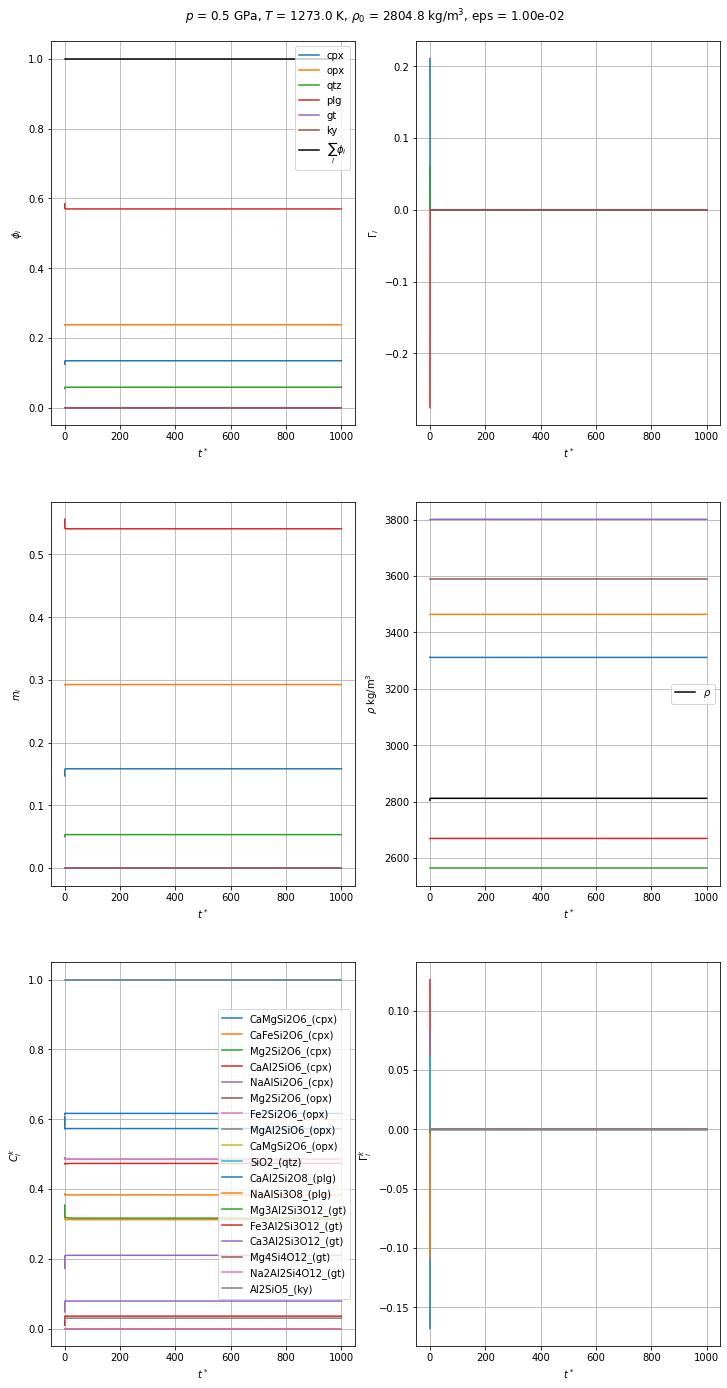

,Clinopyroxene_slb_ph,Orthopyroxene_slb_ph,Quartz_slb_ph,Feldspar_slb_ph,Garnet_slb_ph,Kyanite_slb_ph
Wt% (initial),0.147000,0.29200,0.05000,0.556000,0.000000e+00,0.0
Wt% (final),0.158265,0.29255,0.05338,0.540805,7.170401e-15,0.0


(<py_eclogitization_agu8_slb_rx.eclogitization_agu8_slb_rx at 0x7f9b2e72b970>,
 None,
 None)

In [10]:
model = EcModel(
    reference,
    "eclogitization_agu8_slb_rx",
    mi0=mi0,
    Xik0=Xik0,
    P0=0.5,
    T0=1273,
    nP=0,
    nT=0
)

model.run(reload=False,save=True,end_t=1e3)


In [11]:
model.rxn.report()

Reaction object: eclogitization_agu8_slb_rx

Phase 0 Clinopyroxene_slb_ph (cpx)
     Endmember 0 Diopside_slb_em : CaMgSi2O6_(cpx)
     Endmember 1 Hedenbergite_slb_em : CaFeSi2O6_(cpx)
     Endmember 2 Clinoenstatite_slb_em : Mg2Si2O6_(cpx)
     Endmember 3 CaTschermaks_slb_em : CaAl2SiO6_(cpx)
     Endmember 4 Jadeite_slb_em : NaAlSi2O6_(cpx)
Phase 1 Orthopyroxene_slb_ph (opx)
     Endmember 0 Enstatite_slb_em : Mg2Si2O6_(opx)
     Endmember 1 Ferrosilite_slb_em : Fe2Si2O6_(opx)
     Endmember 2 MgTschermaks_slb_em : MgAl2SiO6_(opx)
     Endmember 3 OrthoDiopside_slb_em : CaMgSi2O6_(opx)
Phase 2 Quartz_slb_ph (qtz)
     Endmember 0 Quartz_slb_em : SiO2_(qtz)
Phase 3 Feldspar_slb_ph (plg)
     Endmember 0 Anorthite_slb_em : CaAl2Si2O8_(plg)
     Endmember 1 Albite_slb_em : NaAlSi3O8_(plg)
Phase 4 Garnet_slb_ph (gt)
     Endmember 0 Pyrope_slb_em : Mg3Al2Si3O12_(gt)
     Endmember 1 Almandine_slb_em : Fe3Al2Si3O12_(gt)
     Endmember 2 Grossular_slb_em : Ca3Al2Si3O12_(gt)
     Endmembe

[ 0.00107877  0.          0.          0.12611344  0.08305576 -0.00100019
  0.          0.00514561  0.          0.06095493 -0.16792733 -0.1077435
 -0.00274767 -0.          0.00307019  0.          0.         -0.        ]


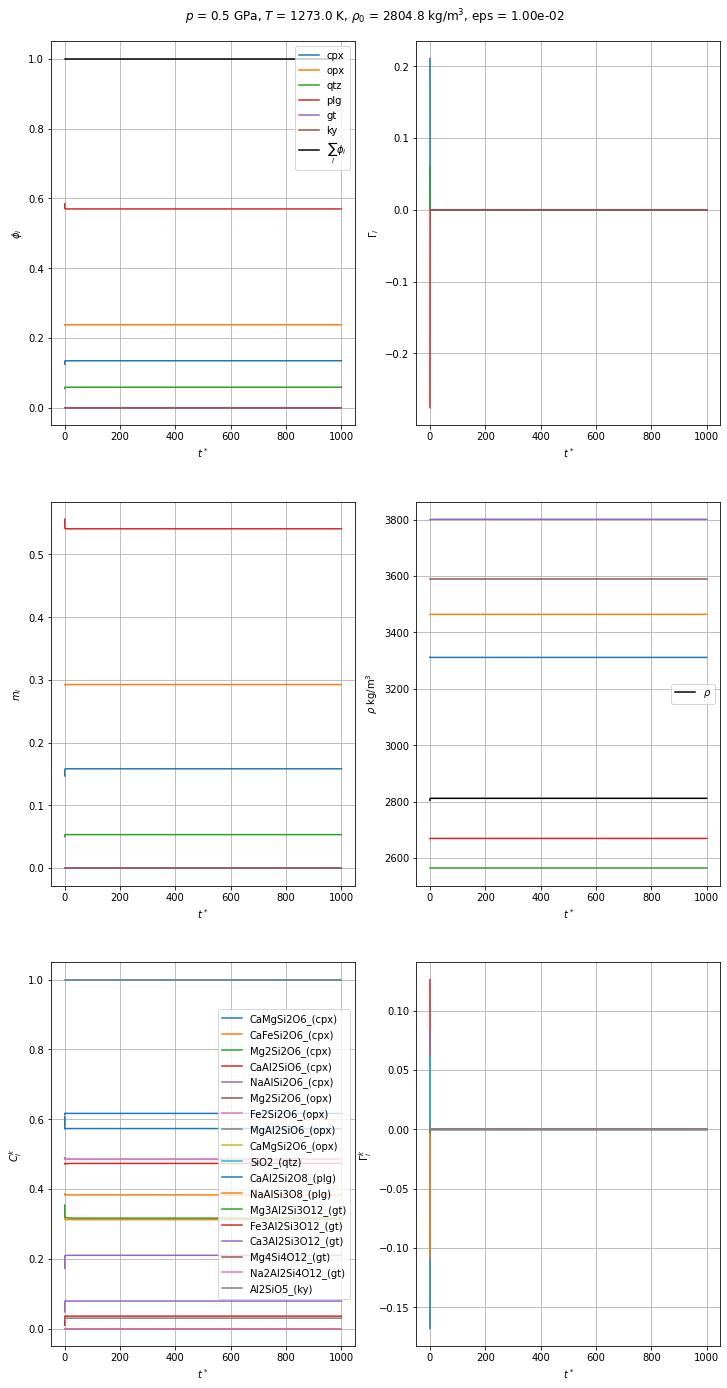

,Clinopyroxene_slb_ph,Orthopyroxene_slb_ph,Quartz_slb_ph,Feldspar_slb_ph,Garnet_slb_ph,Kyanite_slb_ph
Wt% (initial),0.147000,0.29200,0.05000,0.556000,0.000000e+00,0.0
Wt% (final),0.158265,0.29255,0.05338,0.540805,7.170401e-15,0.0


/workspaces/tcg-ec/systems/ec/notebooks/../python/tcg_slb/phasediagram/base.py:1105: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.phaseis = np.asarray([[index(self.uniquestrs,phstr) for phstr in phasestrr]  for phasestrr in self.phasestrs])


(<py_eclogitization_agu8_slb_rx.eclogitization_agu8_slb_rx at 0x7f9b1bfeb470>,
 <tcg_slb.phasediagram.base.PDReactiveProfileDiagnostics at 0x7f9b24075070>)

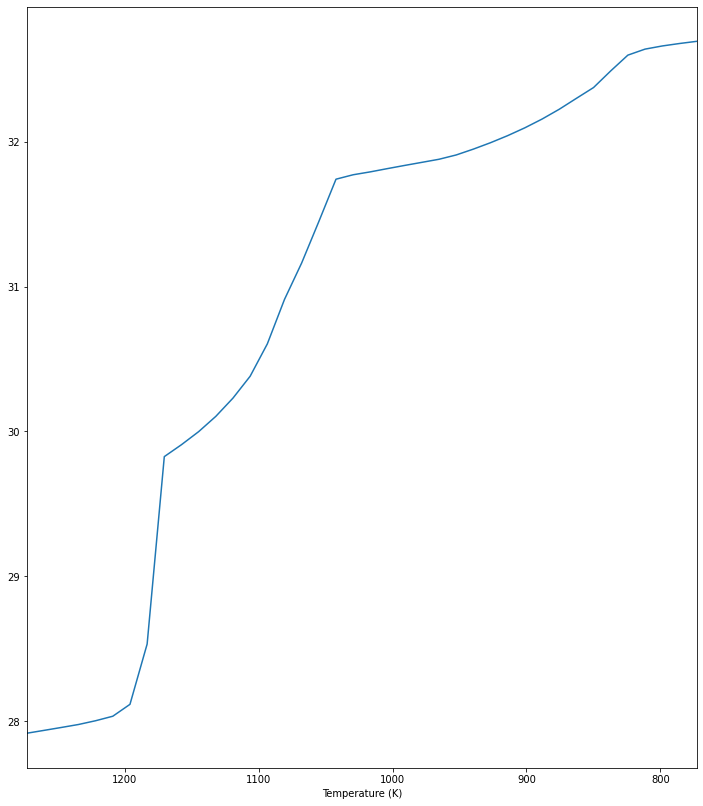

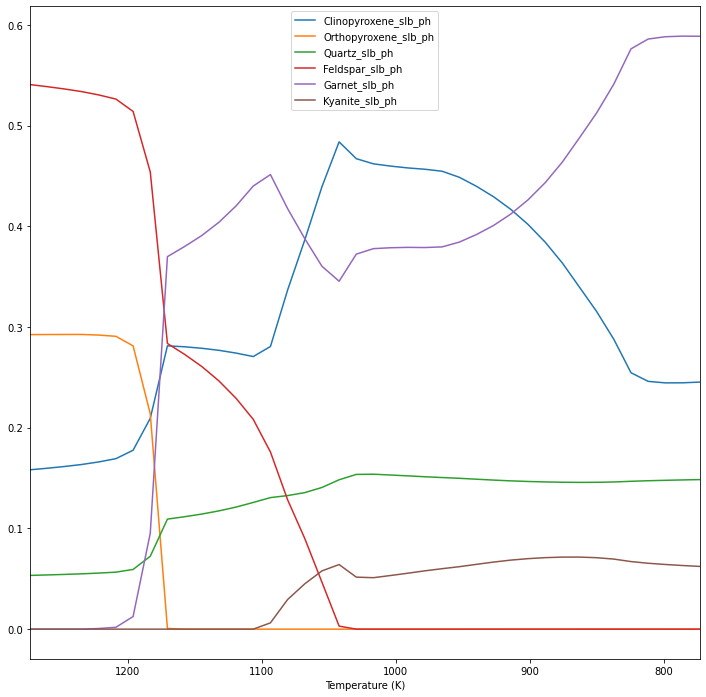

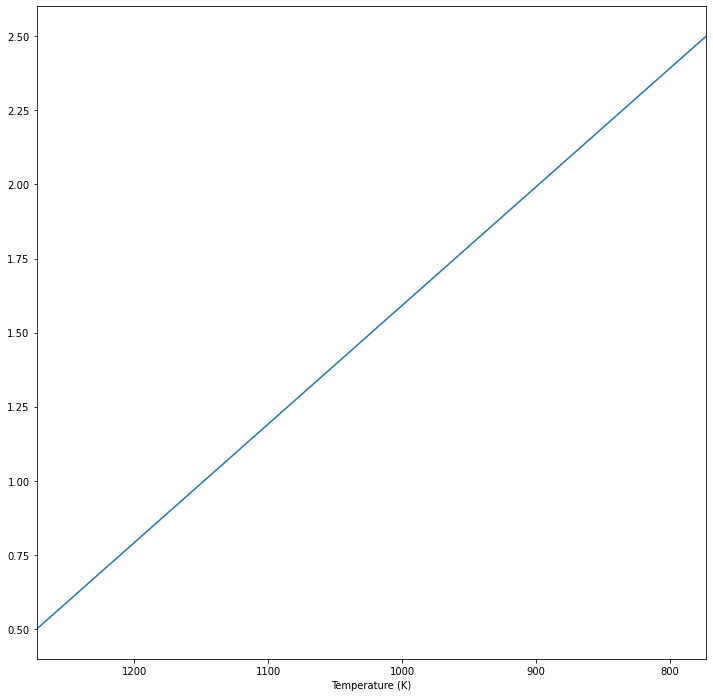

In [12]:
model = EcModel(
    reference,
    "eclogitization_agu8_slb_rx",
    domain="profile",
    mi0=mi0,
    Xik0=Xik0,
    P0=0.5,
    T0=1273,
    Pmin=0.5,
    Pmax=2.5,
    Tmin=1273,
    Tmax=773,
    nP=40,
    nT=40
)

model.run(reload=False,save=True,end_t=1e3)

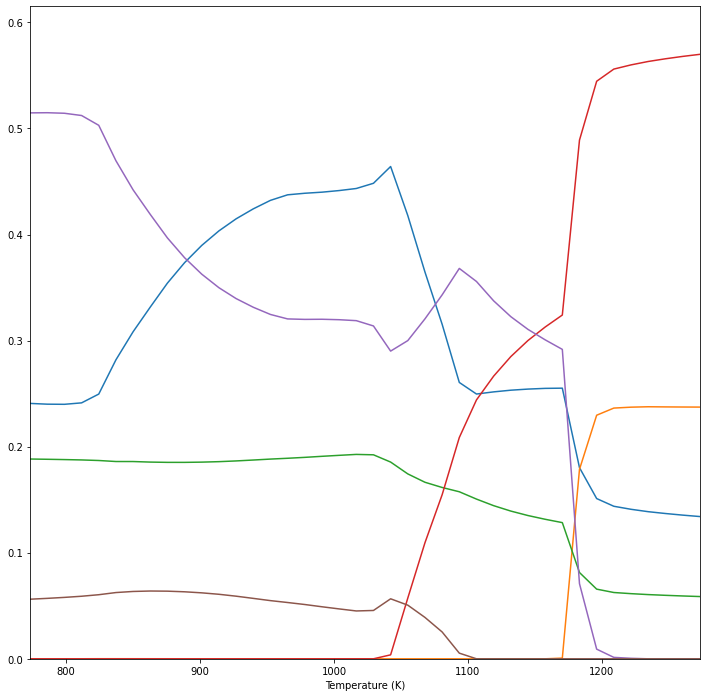

In [14]:
import matplotlib.pyplot as plt
model.bdfdiag.plot_modes_of_all_phases()
plt.ylim([0, 0.615])
plt.xlim([773,1273])